[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/5.1%20%EC%97%85%EC%A2%85%20%ED%85%8C%EB%A7%88%EC%A3%BC%20%EC%88%98%EC%A7%91-input.ipynb)

## 업종/테마 미션

* 팀장님이 우리 회사와 유사한 업종과 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 업종 혹은 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "PER"가 가장 낮은 종목은 무엇일까요?


## 업종/테마주 수집

전체 실습을 하고 아래의 URL로 URL만 변경하게 되면 원하는 업종과 테마를 수집할 수 있습니다.

* 2차 전지 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64
* 제약 업종 : https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261
* 코로나19(덱사메타손) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=442
* 제약업체 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=172
* 바이오시밀러(복제 바이오의약품) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=241

In [17]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [19]:
font_family = get_font_family()

In [20]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [21]:
# 그래프 스타일 설정
plt.style.use("seaborn")

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\petpulslab\AppData\Local\Temp\ipykernel_38748\2960125416.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
C:\Users\petpulslab\AppData\Local\Temp\ipykernel_38748\2960125416.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<Axes: title={'center': '한글'}>

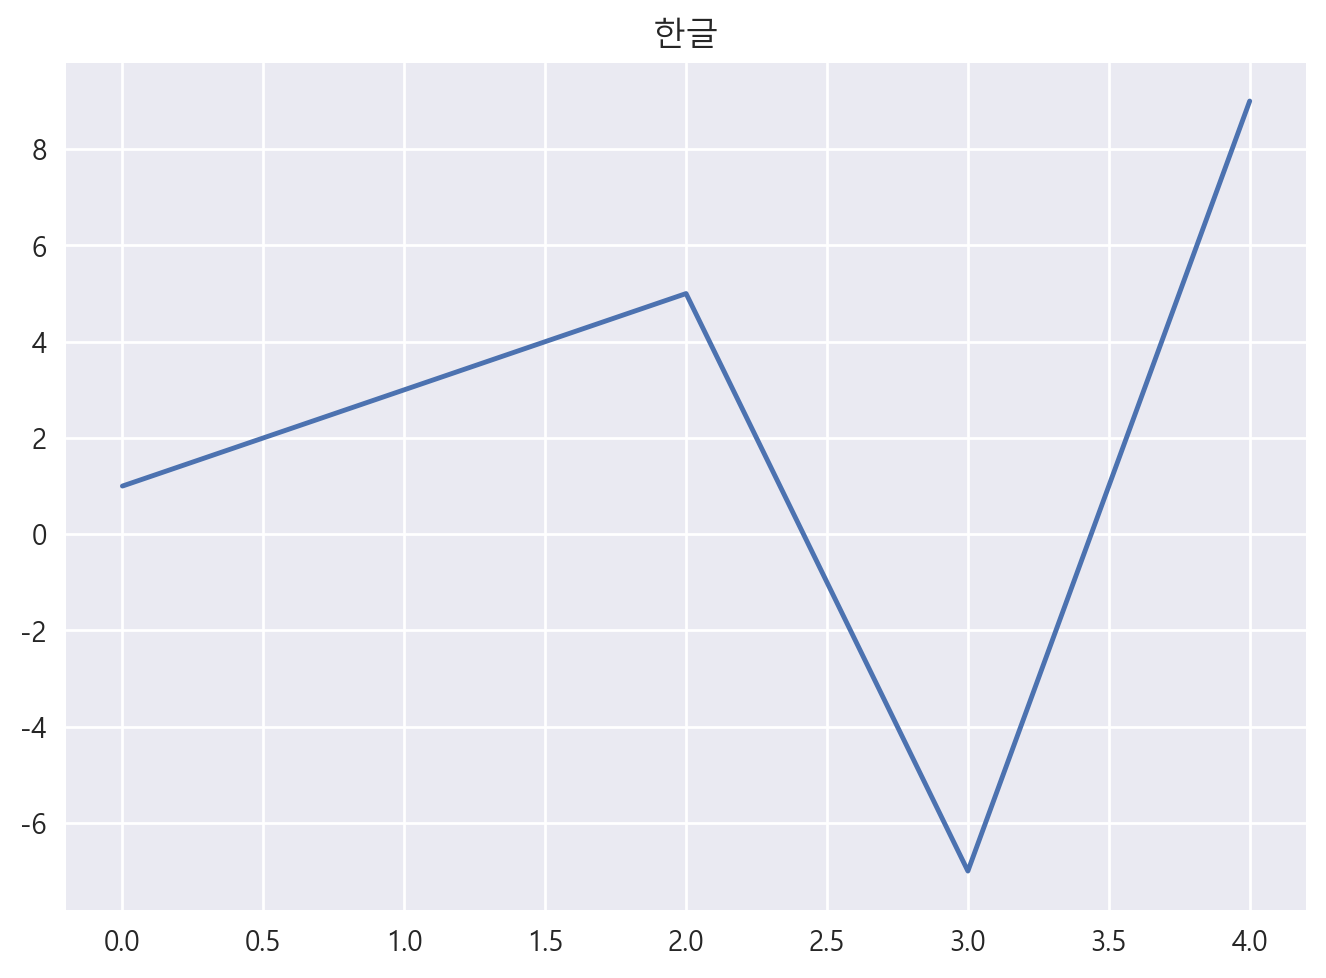

In [22]:
# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1,3,5,-7,9]).plot(title = '한글')

### 제약업종 수집하기
* https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261

In [23]:
# 수집할 업종/테마주소
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35"
# 2차전지
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64"
# 제약
url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261"

In [24]:
# read_html을 통해 해당 업종/테마를 수집합니다.
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [25]:
# 데이터들은 table[2]에 전부 있고
# dropna를 통해 결측치를 제거합니다.
# how='all' 이면 전부 결측치일시 row나 column을 제거합니다.
raw = table[2]
print(raw.shape)
# 3개의 row, 3개의 column이 제거되었습니다.
raw = raw.dropna(how="all").dropna(axis=1, how="all")
print(raw.shape)

(179, 12)
(176, 9)


## 파생변수 만들기

In [26]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록합니다.
import datetime
today = datetime.datetime.today()
today = today.strftime("%y-%m-%d")
today

'23-08-21'

In [27]:
# 일자별로 데이터가 다르니 조회일자를 추가해 줍니다.
raw["조회일자"] = today

In [28]:
# 조회일자가 추가되었는지 확인해 봅니다.
raw

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,지놈앤컴퍼니 *,16140.0,2440.0,+17.81%,16440.0,16500.0,917537.0,14801.0,16343.0,23-08-21
2,이수앱지스 *,7560.0,750.0,+11.01%,7290.0,7300.0,679560.0,5004.0,272086.0,23-08-21
3,카이노스메드 *,4210.0,390.0,+10.21%,4235.0,4245.0,615228.0,2635.0,43792.0,23-08-21
4,대봉엘에스 *,11460.0,950.0,+9.04%,11540.0,11590.0,510039.0,5689.0,376893.0,23-08-21
5,샤페론 *,4520.0,355.0,+8.52%,4510.0,4520.0,848817.0,3778.0,416766.0,23-08-21
...,...,...,...,...,...,...,...,...,...,...
172,퓨쳐켐 *,12370.0,470.0,-3.66%,12360.0,12410.0,322972.0,4044.0,376146.0,23-08-21
173,에이프로젠 H&G *,1818.0,75.0,-3.96%,1791.0,1795.0,867869.0,1580.0,1130082.0,23-08-21
174,보로노이 *,71500.0,3300.0,-4.41%,71500.0,71700.0,214814.0,15688.0,303847.0,23-08-21
175,브릿지바이오테라퓨틱스 *,5070.0,420.0,-7.65%,5080.0,5100.0,142645.0,746.0,155942.0,23-08-21


## 거래량과 거래대금 시각화

<Axes: ylabel='종목명'>

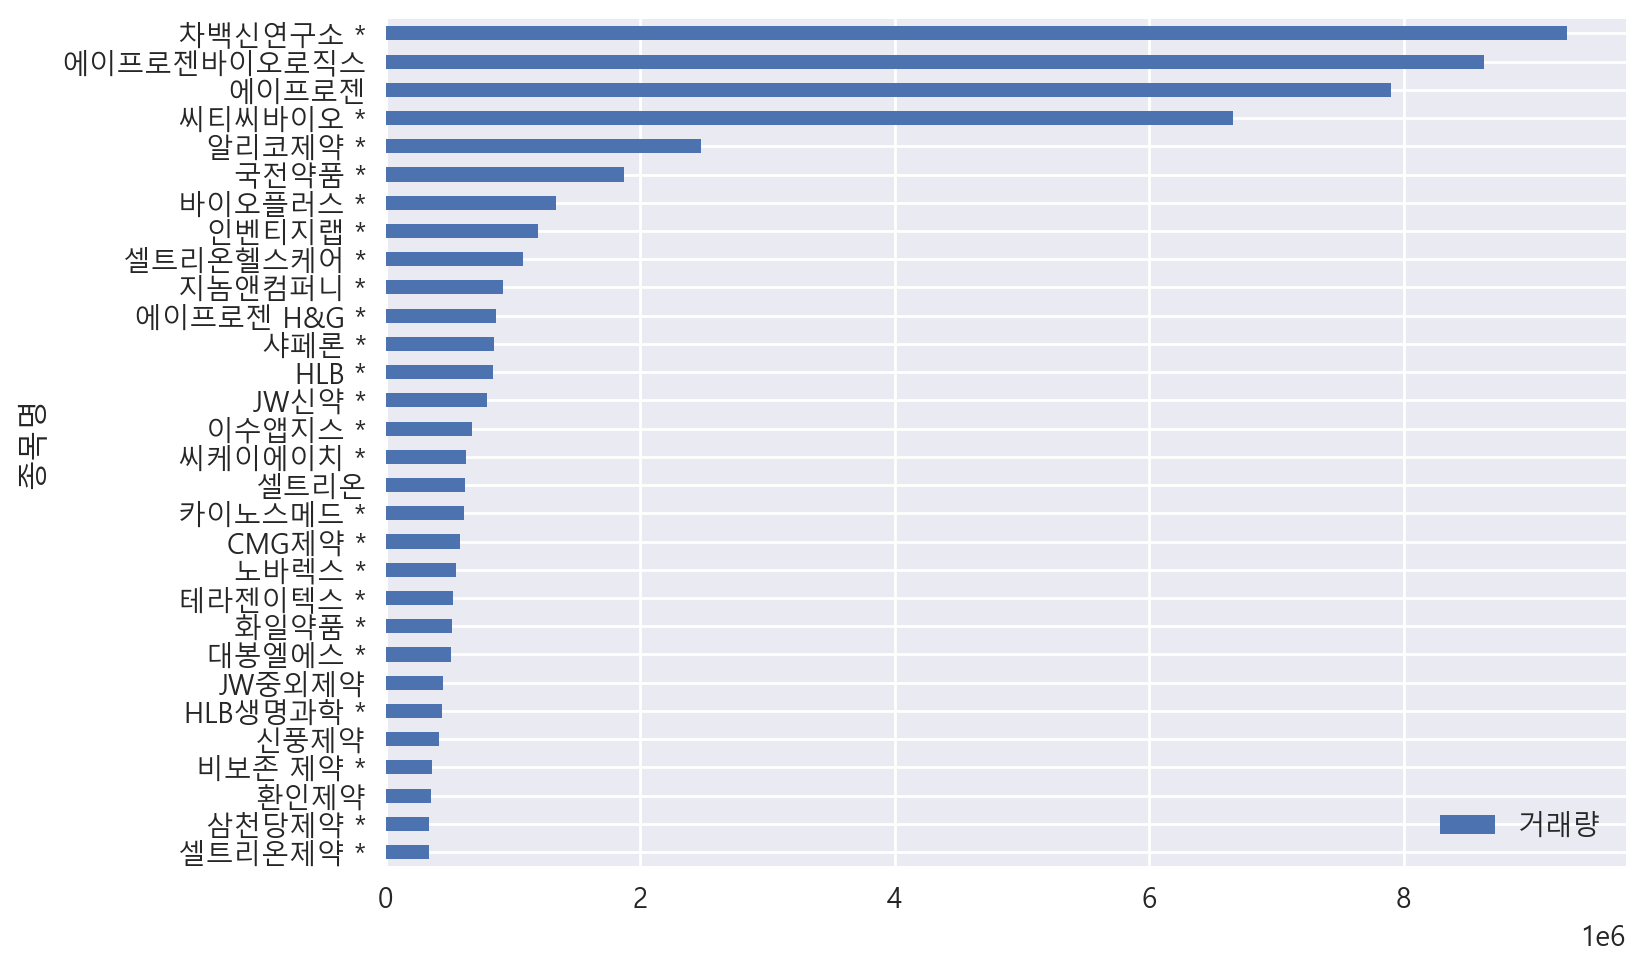

In [29]:
# 종목명 대비 거래량을 bar chart로 그립니다.
# set_index를 해주면 plot시에 y axis label로 그려집니다.
# sort_values시의 기본값이 오름차순이기 때문에 
# DataFrame의 하위 30개를 가져와야 거래량 상위 30개의 종목을 시각화 합니다.
temp = raw[['종목명','거래량']].sort_values("거래량")
temp.set_index('종목명').tail(30).plot.barh()

<Axes: ylabel='종목명'>

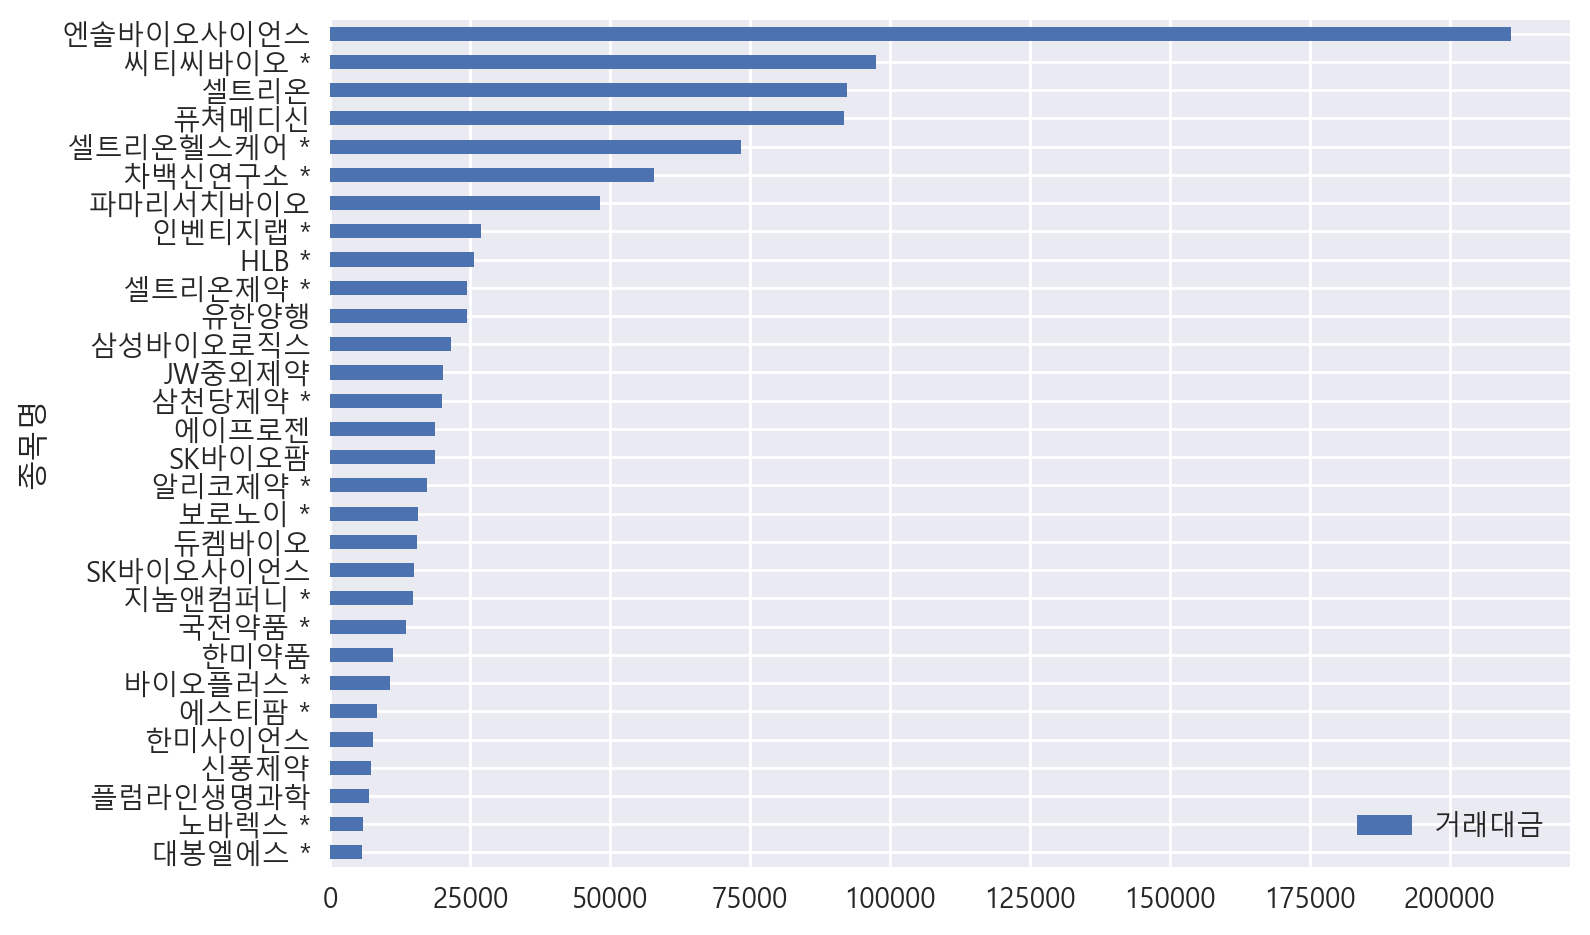

In [30]:
# 위와 동일한 방법으로 종목명 대비 거래대금의 bar chart를 시각화 합니다.
temp = raw[['종목명','거래대금']].sort_values("거래대금")
temp.set_index('종목명').tail(30).plot.barh()

## 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [31]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
raw["종목명_전처리"] = raw['종목명'].str.replace("*","",regex=True)
raw["종목명_전처리"] = raw["종목명_전처리"].str.strip()

In [32]:
# raw 변수에 담긴 데이터프레임을 확인합니다.
raw[['종목명','종목명_전처리']].head()

,종목명,종목명_전처리
1,지놈앤컴퍼니 *,지놈앤컴퍼니
2,이수앱지스 *,이수앱지스
3,카이노스메드 *,카이노스메드
4,대봉엘에스 *,대봉엘에스
5,샤페론 *,샤페론


In [33]:
# 저장해 두었던 전체거래소목록(krx.csv) 파일을 불러오거나 
# FinanceDataReader로 StockListing을 다시 받아서 df_krx 라는 변수에 담습니다.
import FinanceDataReader as fdr
df_krx = fdr.StockListing("KRX")
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,66500,1,200,0.30,66600,67100,66300,7952643,529851137400,396990539575000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,525000,2,-4000,-0.76,530000,534000,522000,223568,117931880000,122850000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,115900,2,-1300,-1.11,117300,118500,115600,2272091,264667326100,84375474103500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,777000,1,6000,0.78,771000,789000,770000,25731,20052928000,55302198000000,71174000,STK
4,005490,KR7005490008,POSCO홀딩스,KOSPI,,550000,1,1000,0.18,549000,563000,545000,832393,460973902000,46514176500000,84571230,STK


### merge 를 통한 종목코드 만들기
* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [34]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져옵니다.
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듭니다.
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면 
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듭니다.
df_item_code_name = df_krx[['Code','Name']]
df_item_code_name.columns = ["종목코드", "종목명_전처리"]
df_item_code_name.head()

,종목코드,종목명_전처리
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,005490,POSCO홀딩스


In [35]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력합니다.
raw.shape

(176, 11)

In [36]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합합니다.
# df = raw.merge(df_item_code_name, right_on='종목명_전처리', left_on='종목명_전처리')
df = raw.merge(df_item_code_name, on='종목명_전처리', how = 'left') 
df.shape

(176, 12)

In [37]:
# 병합이 잘 되었는지 확인합니다.
df

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,지놈앤컴퍼니 *,16140.0,2440.0,+17.81%,16440.0,16500.0,917537.0,14801.0,16343.0,23-08-21,지놈앤컴퍼니,314130
1,이수앱지스 *,7560.0,750.0,+11.01%,7290.0,7300.0,679560.0,5004.0,272086.0,23-08-21,이수앱지스,086890
2,카이노스메드 *,4210.0,390.0,+10.21%,4235.0,4245.0,615228.0,2635.0,43792.0,23-08-21,카이노스메드,284620
3,대봉엘에스 *,11460.0,950.0,+9.04%,11540.0,11590.0,510039.0,5689.0,376893.0,23-08-21,대봉엘에스,078140
4,샤페론 *,4520.0,355.0,+8.52%,4510.0,4520.0,848817.0,3778.0,416766.0,23-08-21,샤페론,378800
...,...,...,...,...,...,...,...,...,...,...,...,...
171,퓨쳐켐 *,12370.0,470.0,-3.66%,12360.0,12410.0,322972.0,4044.0,376146.0,23-08-21,퓨쳐켐,220100
172,에이프로젠 H&G *,1818.0,75.0,-3.96%,1791.0,1795.0,867869.0,1580.0,1130082.0,23-08-21,에이프로젠 H&G,109960
173,보로노이 *,71500.0,3300.0,-4.41%,71500.0,71700.0,214814.0,15688.0,303847.0,23-08-21,보로노이,310210
174,브릿지바이오테라퓨틱스 *,5070.0,420.0,-7.65%,5080.0,5100.0,142645.0,746.0,155942.0,23-08-21,브릿지바이오테라퓨틱스,288330


## 종목상세정보 수집

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [38]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집합니다.
item_code = "068270"
item_name = "셀트리온"


In [39]:
# 종목상세정보를 위한 url을 확보합니다.
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있습니다.
item_url = f"https://finance.naver.com/item/main.naver?code={item_code}"
print(item_url)


https://finance.naver.com/item/main.naver?code=068270


In [40]:
# read_html을 이용해 데이터를 수집합니다.
tables = pd.read_html(item_url, encoding="cp949")
len(tables)

13

In [41]:
# 제대로 수집이 되었는지 확인합니다.
print(tables[3].iloc[:,[0,-1]].shape)
tables[3].iloc[:,[0,-1]]

(16, 2)


,주요재무정보,최근 분기 실적
,주요재무정보,2023.09(E)
,주요재무정보,IFRS연결
0,매출액,6291.00
1,영업이익,2101.00
2,당기순이익,1580.00
3,영업이익률,33.40
4,순이익률,25.11
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN


In [42]:
# tables의 원소값을 확인하여 원하는 데이터가 어디에 있는지 확인합니다.
pd.concat([tables[6],tables[7],tables[8],tables[9]]).set_index(0).T

,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2023.06),추정PERlEPS,PBRlBPS (2023.06),배당수익률l2022.12,동일업종 PER,동일업종 등락률
1,146402770,29589485,20.21%,"4.00매수 l 211,250","196,508 l 139,500","38.75배 l 3,750원","34.00배 l 4,279원","4.86배 l 29,918원",0.25%,88.07배,-0.18%


## 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [43]:
# 수집한 정보를 item_info에 list 형태로 관리합니다.
item_info = []

In [44]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
finance_info = tables[3].iloc[:,[0,-1]]
finance_info.columns = [0,1]
item_info.append(finance_info)
item_info

[            0        1
 0         매출액  6291.00
 1        영업이익  2101.00
 2       당기순이익  1580.00
 3       영업이익률    33.40
 4        순이익률    25.11
 5   ROE(지배주주)      NaN
 6        부채비율      NaN
 7        당좌비율      NaN
 8         유보율      NaN
 9      EPS(원)  1153.00
 10     PER(배)   130.49
 11     BPS(원)      NaN
 12     PBR(배)      NaN
 13   주당배당금(원)      NaN
 14   시가배당률(%)      NaN
 15    배당성향(%)      NaN]

In [45]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
# 위에서 만든 item_info 에 리스트 형태로 추가합니다.
for t in tables:
    if t.shape[1] == 2:
        item_info.append(t)

In [46]:
# 위에서 만든 리스트의 값을 확인합니다.
item_info

[            0        1
 0         매출액  6291.00
 1        영업이익  2101.00
 2       당기순이익  1580.00
 3       영업이익률    33.40
 4        순이익률    25.11
 5   ROE(지배주주)      NaN
 6        부채비율      NaN
 7        당좌비율      NaN
 8         유보율      NaN
 9      EPS(원)  1153.00
 10     PER(배)   130.49
 11     BPS(원)      NaN
 12     PBR(배)      NaN
 13   주당배당금(원)      NaN
 14   시가배당률(%)      NaN
 15    배당성향(%)      NaN,
           0               1
 0      시가총액  21조  2,723  억원
 1    시가총액순위         코스피 15위
 2     상장주식수       146402770
 3  액면가l매매단위   1,000원  l  1주,
              0          1
 0  외국인한도주식수(A)  146402770
 1  외국인보유주식수(B)   29589485
 2  외국인소진율(B/A)     20.21%,
            0                    1
 0  투자의견l목표주가   4.00매수  l  211,250
 1   52주최고l최저  196,508  l  139,500,
                    0                  1
 0   PERlEPS(2023.06)  38.75배  l  3,750원
 1          추정PERlEPS  34.00배  l  4,279원
 2  PBRlBPS (2023.06)  4.86배  l  29,918원
 3      배당수익률l2022.12              0.25%,
           0       1
 0 

## concat을 통해 데이터를 병합

* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [47]:
# item_info[0] 의 컬럼명을 봅니다. 같은 컬럼이 아니면 행끼리 합칠 수 없습니다.
item_info[2]

,0,1
0,외국인한도주식수(A),146402770
1,외국인보유주식수(B),29589485
2,외국인소진율(B/A),20.21%


In [48]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,6291.0
1,영업이익,2101.0
2,당기순이익,1580.0
3,영업이익률,33.4
4,순이익률,25.11
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),1153.0


## transpose를 통해 행과 열의 위치를 변경

In [49]:
df_item.set_index(0)

,1
0,
매출액,6291.0
영업이익,2101.0
당기순이익,1580.0
영업이익률,33.4
순이익률,25.11
ROE(지배주주),NaN
부채비율,NaN
당좌비율,NaN
유보율,NaN


In [50]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
df_item = df_item.set_index(0).T
df_item['종목코드'] = item_code
df_item

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2023.06),추정PERlEPS,PBRlBPS (2023.06),배당수익률l2022.12,동일업종 PER,동일업종 등락률,종목코드
1,6291.0,2101.0,1580.0,33.4,25.11,NaN,NaN,NaN,NaN,1153.0,...,20.21%,"4.00매수 l 211,250","196,508 l 139,500","38.75배 l 3,750원","34.00배 l 4,279원","4.86배 l 29,918원",0.25%,88.07배,-0.18%,068270


## 개별 주가 정보를 수집하는 함수를 생성

In [51]:
# 위에서 한 종목코드에 대해 개별 주가 정보를 얻는 방법을 확인하였으니,
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 줍니다. 
# sleep을 사용해서 서버에 무리한 요청을 하지 않습니다.
import time

def get_item_info(item_code):
    
    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")
    
    item_info = []
    finance_info = tables[3].iloc[:, [0, -1]]
    finance_info.columns = [0, 1]
    item_info.append(finance_info)
    
    for t in tables:
        if t.shape[1] == 2:
            item_info.append(t)
            
    df_item = pd.concat(item_info,  ignore_index=True)
    df_item = df_item.set_index(0).T
    df_item['종목코드'] = item_code
    time.sleep(0.1)
    return df_item

In [53]:
# 데이터프레임 형태로 종목정보를 수집해 왔습니다.
# 다른 종목도 아래와 같은 형태로 모아서 concat 으로 연결해 준다면 
# 종목끼리 정보를 비교해 볼 수 있을것 같습니다.
get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2023.06),추정PERlEPS,PBRlBPS (2023.06),배당수익률l2022.12,동일업종 PER,동일업종 등락률,종목코드
1,6291.0,2101.0,1580.0,33.4,25.11,NaN,NaN,NaN,NaN,1153.0,...,20.21%,"4.00매수 l 211,250","196,508 l 139,500","38.75배 l 3,750원","34.00배 l 4,279원","4.86배 l 29,918원",0.25%,88.07배,-0.18%,068270


## tqdm은?
* 오래 걸리는 작업의 진행 상태를 표시합니다.
* https://tqdm.github.io/

In [54]:
# # tqdm은 total quality data management의 약자입니다.
# # tqdm.auto 에서 tqdm을 불러옵니다.
# from tqdm.auto import tqdm
# tqdm.pandas()

In [55]:
# # DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# # result에 series형태로 저장됩니다.

# # 너무너무 오래걸리고 잘 안 됨...;;
# result = df['종목코드'].progress_apply(get_item_info)

  0%|          | 0/176 [00:00<?, ?it/s]

In [63]:
# # 피클로 저장
# import pickle
# with open('result.pkl', 'wb') as f:
#     pickle.dump(result, f)

In [64]:
# 피클로 불러오기
import pickle

with open('result.pkl', 'rb') as f:
    result = pickle.load(f)

In [67]:
result[0]

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2023.03),추정PERlEPS,PBRlBPS (2023.03),배당수익률,동일업종 PER,동일업종 등락률,종목코드
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.74%,N/A l N/A,"32,500 l 12,590","N/A l -3,483원",N/A l N/A,"2.91배 l 5,584원",NaN,88.07배,-0.14%,314130


In [99]:
df_item_col = result[0].columns
df_item_info = pd.DataFrame(columns=df_item_col)
df_item_info = pd.concat([df_item_info, pd.DataFrame(result[0])])
df_item_info = pd.concat([df_item_info, pd.DataFrame(result[1])])
df_item_info

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2023.03),추정PERlEPS,PBRlBPS (2023.03),배당수익률,동일업종 PER,동일업종 등락률,종목코드
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.74%,N/A l N/A,"32,500 l 12,590","N/A l -3,483원",N/A l N/A,"2.91배 l 5,584원",NaN,88.07배,-0.14%,314130
1,171.0,16.0,-5.0,9.36,-2.92,NaN,NaN,NaN,NaN,-15.0,...,1.68%,N/A l N/A,"8,220 l 4,950",N/A l -198원,N/A l N/A,"4.16배 l 1,800원",NaN,88.07배,-0.14%,086890


## concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [96]:
cnt = 0 
not_raw = []
for i in range(len(result)):
    if result[i].shape[1] != 32:
        not_raw.append(i)
        cnt+=1
print(cnt)
print(not_raw)

14
[5, 6, 13, 27, 59, 77, 112, 114, 121, 122, 136, 153, 154, 175]


In [100]:
df_item_col = result[0].columns
df_item_info = pd.DataFrame(columns=df_item_col)

for i in range(len(result)):
    if result[i].shape[1] == 32:
        df_item_info = pd.concat([df_item_info, pd.DataFrame(result[i])])
        
df_item_info

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,동일업종 등락률,종목코드,배당수익률l2022.12,PERlEPS(2022.12),PBRlBPS (2022.12),PERlEPS(2023.06),PBRlBPS (2023.06),PERlEPS(2023.05),PBRlBPS (2023.05),배당수익률l2022.11
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.14%,314130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,171.0,16.0,-5.0,9.36,-2.92,NaN,NaN,NaN,NaN,-15.0,...,-0.14%,086890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.14%,284620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.21%,078140,0.44%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.14%,378800,NaN,N/A l -532원,"3.64배 l 1,239원",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,6291.0,2101.0,1580.0,33.4,25.11,NaN,NaN,NaN,NaN,1153.0,...,-0.08%,068270,0.25%,NaN,NaN,"38.72배 l 3,750원","4.85배 l 29,918원",NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.08%,220100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.14%,109960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.14%,310210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
# df_item_info
# df_item_info = pd.concat(result.tolist())
df_item_info = df_item_info.reset_index()
del df_item_info['index']

In [104]:
df_item_info.head()

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,동일업종 등락률,종목코드,배당수익률l2022.12,PERlEPS(2022.12),PBRlBPS (2022.12),PERlEPS(2023.06),PBRlBPS (2023.06),PERlEPS(2023.05),PBRlBPS (2023.05),배당수익률l2022.11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.14%,314130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,171.0,16.0,-5.0,9.36,-2.92,NaN,NaN,NaN,NaN,-15.0,...,-0.14%,086890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.14%,284620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.21%,078140,0.44%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.14%,378800,NaN,N/A l -532원,"3.64배 l 1,239원",NaN,NaN,NaN,NaN,NaN


In [105]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
df.shape

(176, 12)

## merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [109]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
# df_info
df_info = df.merge(df_item_info, left_index=True,right_index=True)

In [110]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

((176, 12), (162, 40), (162, 52))

In [111]:
# 일부 데이터만 가져와서 확인합니다.
df_info.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,동일업종 등락률,종목코드_y,배당수익률l2022.12,PERlEPS(2022.12),PBRlBPS (2022.12),PERlEPS(2023.06),PBRlBPS (2023.06),PERlEPS(2023.05),PBRlBPS (2023.05),배당수익률l2022.11
0,지놈앤컴퍼니 *,16140.0,2440.0,+17.81%,16440.0,16500.0,917537.0,14801.0,16343.0,23-08-21,...,-0.14%,314130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,이수앱지스 *,7560.0,750.0,+11.01%,7290.0,7300.0,679560.0,5004.0,272086.0,23-08-21,...,-0.14%,086890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,카이노스메드 *,4210.0,390.0,+10.21%,4235.0,4245.0,615228.0,2635.0,43792.0,23-08-21,...,-0.14%,284620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,대봉엘에스 *,11460.0,950.0,+9.04%,11540.0,11590.0,510039.0,5689.0,376893.0,23-08-21,...,-0.21%,078140,0.44%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,샤페론 *,4520.0,355.0,+8.52%,4510.0,4520.0,848817.0,3778.0,416766.0,23-08-21,...,-0.14%,378800,NaN,N/A l -532원,"3.64배 l 1,239원",NaN,NaN,NaN,NaN,NaN


## 파일명 만들기

In [112]:
# 파일 이름을 url의 정보를 이용하여 만듭니다.
# 업종_no_번호_날짜.csv, 혹은 테마_no_번호.csv 형태로 만듭니다.
# file_name
file_name_1 = url.split("=")[1].replace("&","_")
file_name_2 = url.split("=")[2]
file_name = f"{file_name_1}_{file_name_2}_{today}.csv"
file_name

'upjong_no_261_23-08-21.csv'

In [113]:
# csv 파일로 저장합니다.
df_info.to_csv(file_name, index=False)

In [114]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,동일업종 등락률,종목코드_y,배당수익률l2022.12,PERlEPS(2022.12),PBRlBPS (2022.12),PERlEPS(2023.06),PBRlBPS (2023.06),PERlEPS(2023.05),PBRlBPS (2023.05),배당수익률l2022.11
0,지놈앤컴퍼니 *,16140.0,2440.0,+17.81%,16440.0,16500.0,917537.0,14801.0,16343.0,23-08-21,...,-0.14%,314130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,이수앱지스 *,7560.0,750.0,+11.01%,7290.0,7300.0,679560.0,5004.0,272086.0,23-08-21,...,-0.14%,86890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,카이노스메드 *,4210.0,390.0,+10.21%,4235.0,4245.0,615228.0,2635.0,43792.0,23-08-21,...,-0.14%,284620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,대봉엘에스 *,11460.0,950.0,+9.04%,11540.0,11590.0,510039.0,5689.0,376893.0,23-08-21,...,-0.21%,78140,0.44%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,샤페론 *,4520.0,355.0,+8.52%,4510.0,4520.0,848817.0,3778.0,416766.0,23-08-21,...,-0.14%,378800,NaN,N/A l -532원,"3.64배 l 1,239원",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,코스맥스비티아이,10010.0,170.0,-1.67%,9930.0,9940.0,11492.0,114.0,17359.0,23-08-21,...,-0.08%,68270,0.25%,NaN,NaN,"38.72배 l 3,750원","4.85배 l 29,918원",NaN,NaN,NaN
158,종근당바이오,22550.0,400.0,-1.74%,22650.0,22700.0,3368.0,76.0,6088.0,23-08-21,...,-0.08%,220100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,환인제약,14710.0,270.0,-1.80%,14690.0,14700.0,355234.0,5454.0,66708.0,23-08-21,...,-0.14%,109960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,에이프릴바이오 *,22350.0,450.0,-1.97%,21950.0,22050.0,214491.0,4817.0,330266.0,23-08-21,...,-0.14%,310210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
